# Classificação de diabetes utilizando dados médicos e demográficos

A Diabetes, também conhecida como diabetes mellitus, é uma condição caracterizada pela produção insuficiente ou má absorção de insulina, um hormônio responsável por regular os níveis de glicose no sangue e fornecer energia ao organismo. De acordo com a [Sociedade Brasileira de Diabetes](https://diabetes.org.br/), aproximadamente 5 a 10% das pessoas afetadas possuem Diabetes Tipo 1, enquanto cerca de 90% apresentam Diabetes Tipo 2. Além dessas formas, existem ainda outros grupos que podem ser diagnosticados com diabetes, como o Diabetes Gestacional e o Pré-diabetes.

O [conjunto de dados](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset) consiste em uma coleção de informações médicas e demográficas de pacientes, juntamente com o status em relação à diabetes (positivo ou negativo). Esses dados são valiosos para o desenvolvimento de modelos de aprendizado de máquina, permitindo a criação de algoritmos capazes de prever a ocorrência de diabetes em pacientes com base em seu histórico médico e informações demográficas. Essa abordagem pode fornecer insights importantes para a detecção precoce da doença e o desenvolvimento de estratégias de tratamento mais eficazes.

## Dicionário de dados

A seguir é demonstrado os campos da base de dados e seus respectivos descritivos do que significam cada uma, sendo dados médicos e dados demográficos dos pacientes, como informado anteriormente.

| CAMPO | DESCRIÇÃO |
| :- | :- |
| gender | Sexo biológico do paciente, podendo ser Female (Feminino), Male (Masculino) ou Other (Outros). |
| age | Idade do paciente. |
| hypertension | Hipertensão, flag indicativa se o paciente possui ou não a hispertensão, sendo 0 (não tem hipertensão) e 1 (tem hipertensão). |
| heart_disease | Doença cardíaca, flag indicativa se o paciente possui ou não doença cardíaca, 0 (não tem docença cardíaca) e 1 (tem doença cardíaca). |
| smoking_history | Histórico de tabagismo, 6 categorias que indicam se o paciente possui histório de tabagismo, podendo ser, never (nunca), No Info (sem informação), current (atual/atualmente), former (anterior), ever (sempre), not current (não atual/não atualmente). |
| bmi | BMI ou IMC (Índice de Massa Corporal) medida de gordura corporal com base no peso e na altura. |
| HbA1c_level | HbA1c_level ou nível de Hemoglobina A1c ou Hemoglobina Glicada - A1c, é uma medida do nível médio de açúcar no sangue de uma pessoa nos últimos 2-3 meses. |
| blood_glucose_level | blood_glucose_level ou nível de glicose no sangue, indica a quantidade de glicose na corrente sanguínea em um determinado momento. |
| diabetes | diabetes é a variável alvo (target) ou variável dependente (Y), indica se o paciente possui ou não diabetes, sendo 0 (negativo para diabetes) e 1 (positivo para diabetes). |

## Entendimento dos dados

In [1]:
#Importar bibliotecas

import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#Apresenta os dados no notebook
%matplotlib inline

#Estilo dos gráficos
sns.set_style("darkgrid")

from collections import Counter

#Train test
from sklearn.model_selection import train_test_split

#Padronização dos dados
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Balanceamento de classes
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

#Modelo
from sklearn.linear_model import LogisticRegression

#Avaliação do modelo
from sklearn import metrics

#Exporta modelo (salvar)
import pickle

In [4]:
#Leitura e tamanho da amostra

df = pd.read_csv("data/diabetes_prediction_dataset.csv")
df.shape

(100000, 9)

## Análise descritiva

In [5]:
#Tipagem dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
#Verificação qtd de nulos

df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
#Primeiros dados

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
#Últimos dados

df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [9]:
#Descrição estatistica

df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


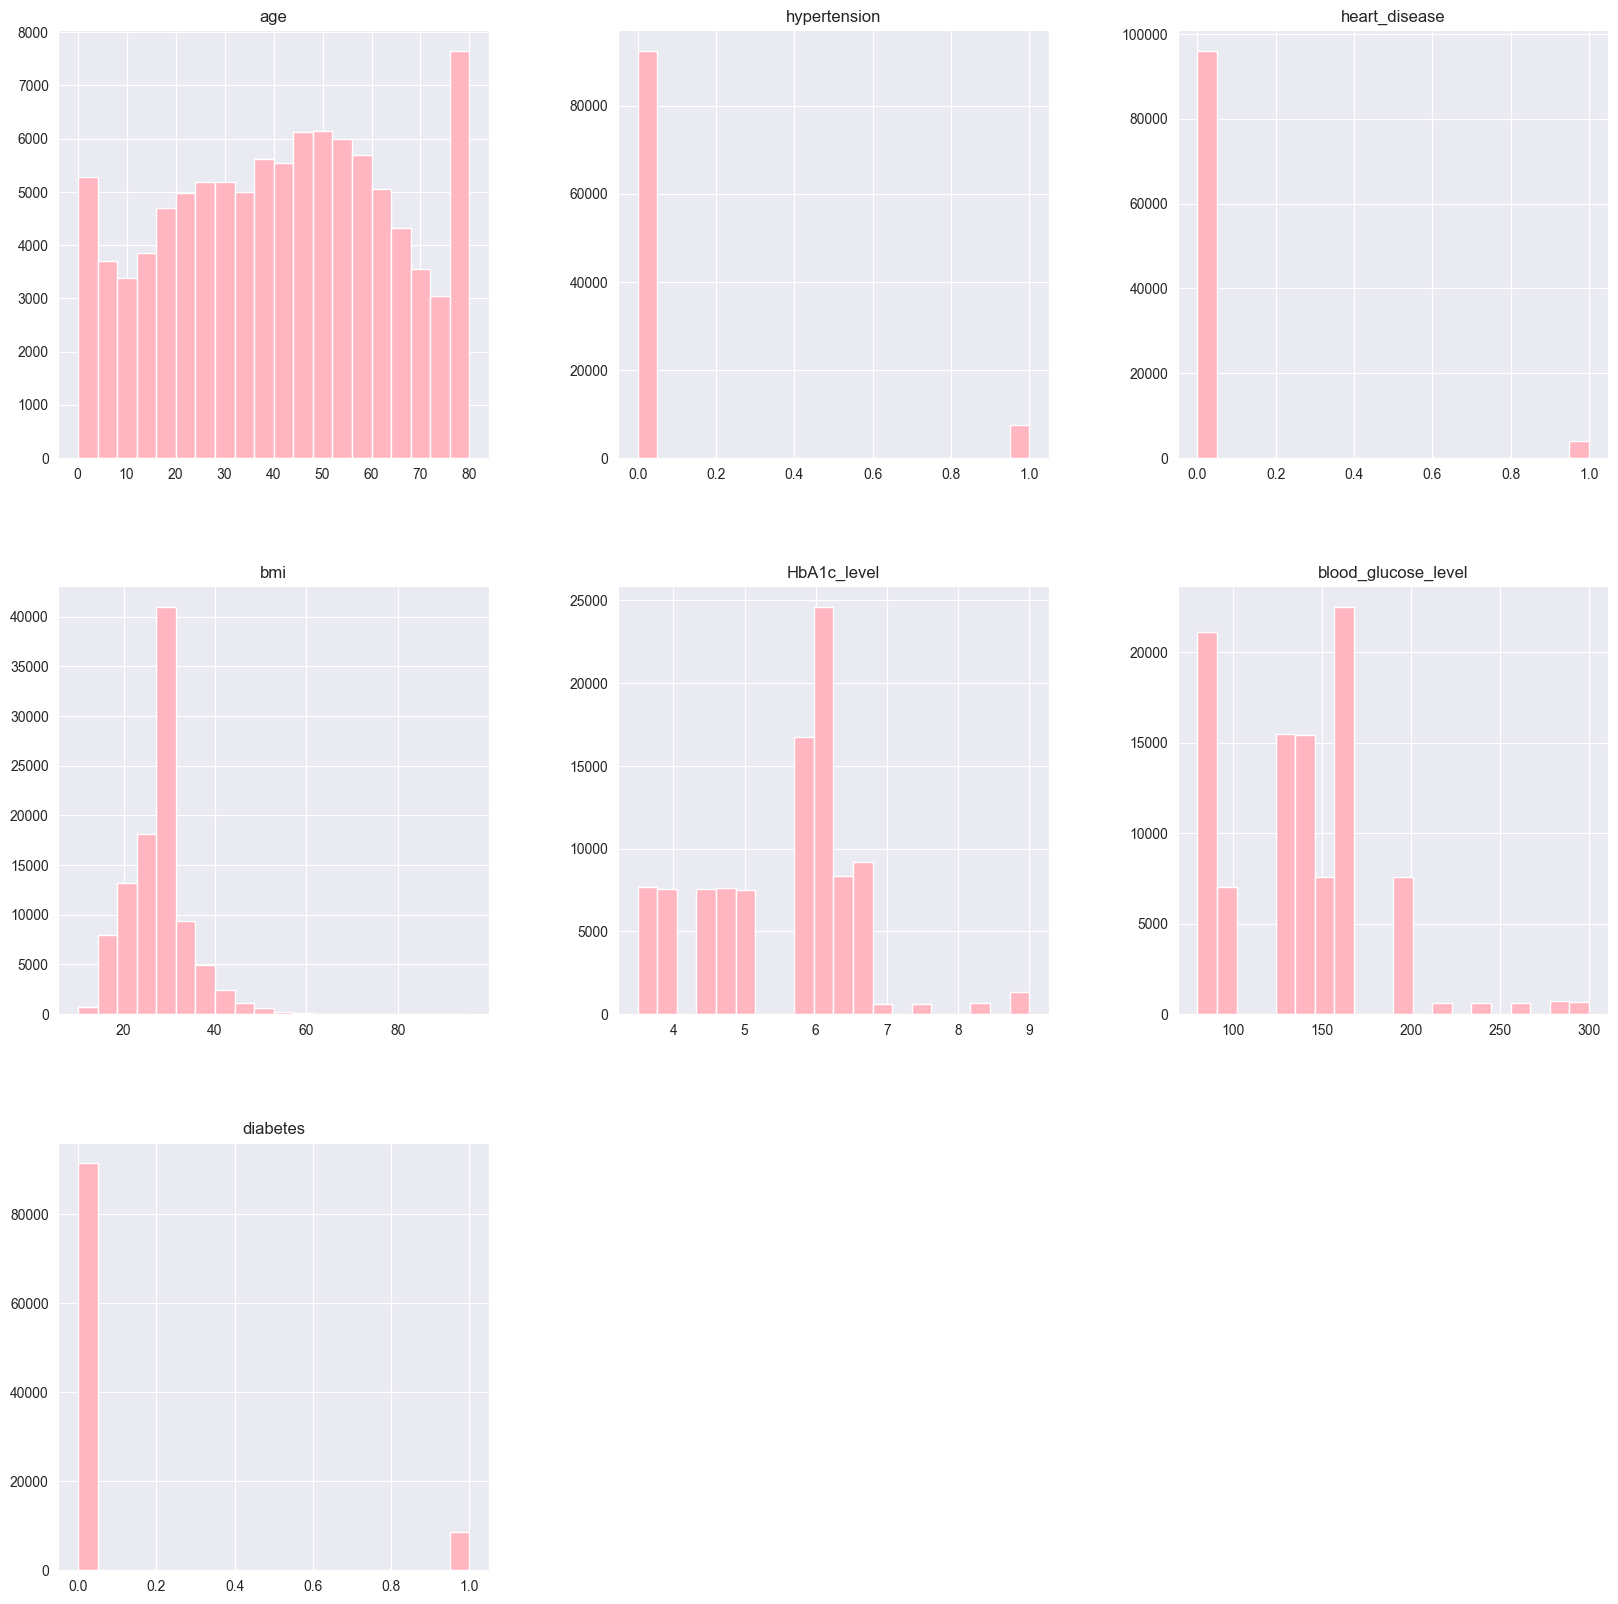

In [73]:
#Análise por variável

eixo = df.hist(bins=20, color='lightpink', figsize=(20,20))

In [12]:
#Verificando quantitativo por classe da variável dependente (Y)

df["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

## Análise exploratória

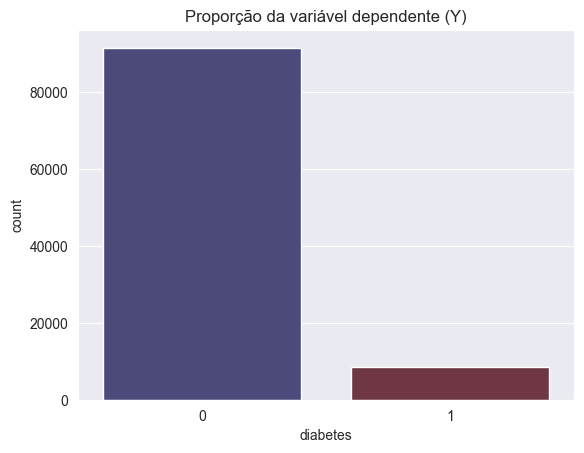

In [20]:
#Proporção da variável dependente (Y)

sns.countplot(data=df, x='diabetes', palette="icefire")
plt.title('Proporção da variável dependente (Y)')
plt.show()

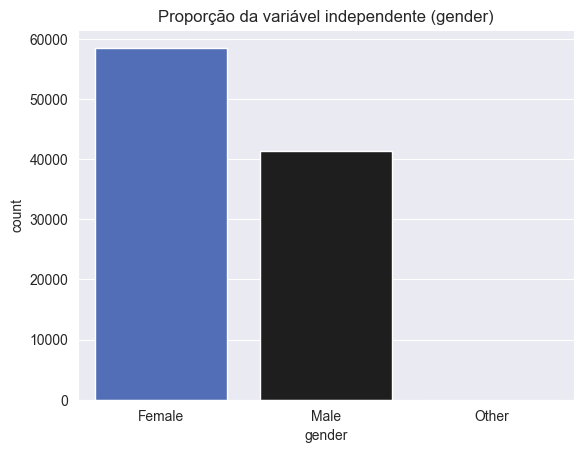

In [21]:
#Proporção da variável independente (gender)

sns.countplot(data=df, x='gender',palette="icefire")
plt.title('Proporção da variável independente (gender)')
plt.show()

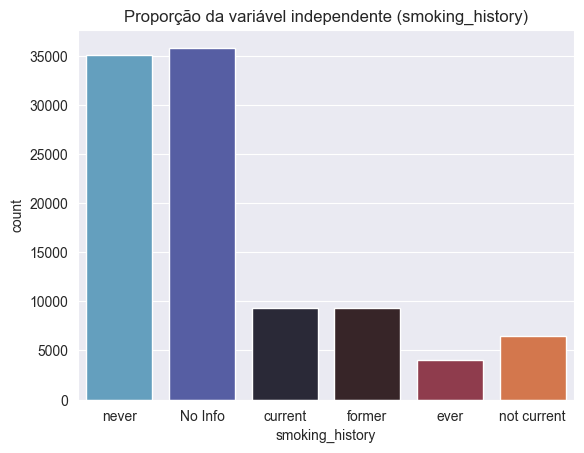

In [19]:
#Proporção da variável independente (smoking_history)

sns.countplot(data=df, x='smoking_history', palette="icefire")
plt.title('Proporção da variável independente (smoking_history)')
plt.show()

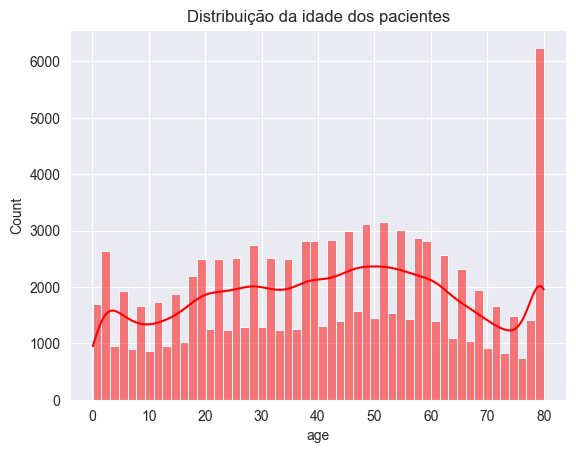

In [26]:
#Distribuição da idade dos pacientes

sns.histplot(data=df, x='age', kde=True, color="red")
plt.title('Distribuição da idade dos pacientes')
plt.show()

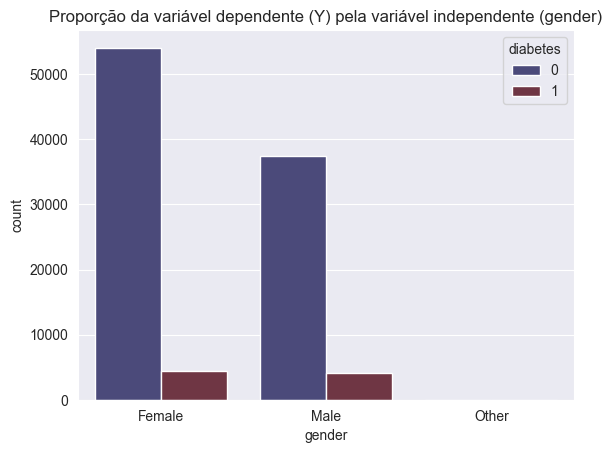

In [31]:
#Proporção da variável dependente (Y) pela variável independente (gender)

sns.countplot(data=df, x='gender', hue='diabetes', palette="icefire")
plt.title('Proporção da variável dependente (Y) pela variável independente (gender)')
plt.show()

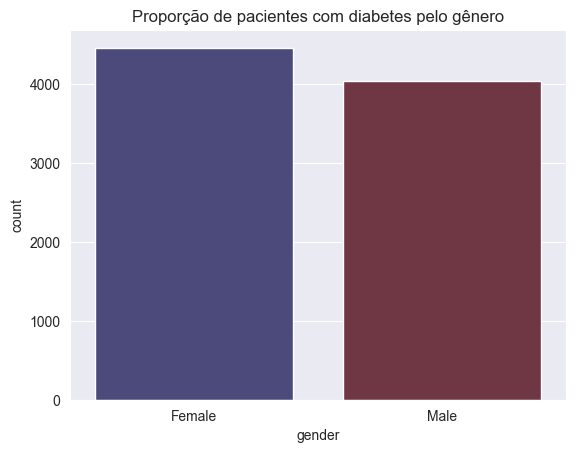

In [32]:
#Proporção de pacientes com diabetes pelo gênero

sns.countplot(data=df.loc[df.diabetes == 1], x='gender', palette="icefire")
plt.title('Proporção de pacientes com diabetes pelo gênero')
plt.show()

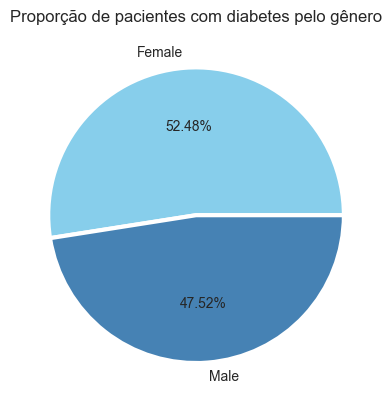

In [57]:
#Proporção de pacientes com diabetes pelo gênero em %

ax = df["gender"].loc[df.diabetes == 1].value_counts().plot(x=None, y=None, kind='pie', autopct='%1.2f%%', labels=['Female', 'Male'], wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=['skyblue', 'steelblue'])
plt.title('Proporção de pacientes com diabetes pelo gênero')
ax.set_ylabel('')
plt.show()

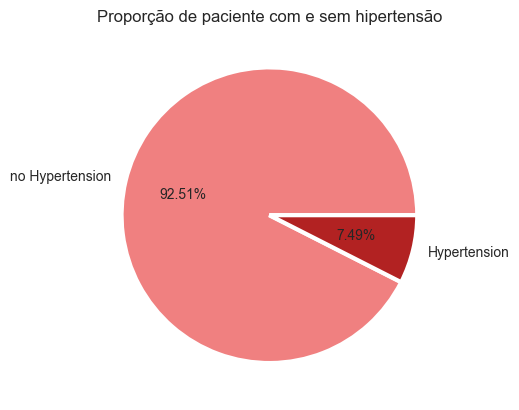

In [53]:
#Proporção de pacientes com e sem hipertensão

ax = df["hypertension"].value_counts().plot(x=None, y=None, kind='pie', autopct='%1.2f%%', labels=['no Hypertension', 'Hypertension'], wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=['lightcoral', 'firebrick'])
plt.title('Proporção de paciente com e sem hipertensão')
ax.set_ylabel('')
plt.show()

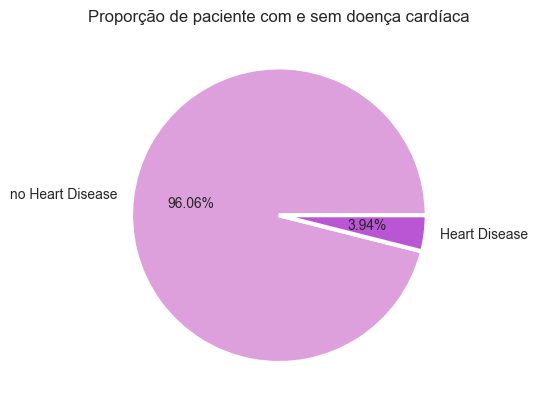

In [70]:
#Proporção de paciente com e sem doença cardíaca

ax = df["heart_disease"].value_counts().plot(x=None, y=None, kind='pie', autopct='%1.2f%%', labels=['no Heart Disease', 'Heart Disease'], wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=['plum', 'mediumorchid'])
plt.title('Proporção de paciente com e sem doença cardíaca')
ax.set_ylabel('')
plt.show()

## Modelagem

## Pressupostos do modelo de Regressão Logística Binária

* 1 - Variável dependente dicotômica (categorias mutuamente exclusivas);
* 2 - Independência das observações (sem medidas repetidas);
* 3 - Ausência de outliers/pontos de alavancagem;
* 4 - Ausência de multicolinearidade;
* 5 - Relação linear entre cada VI contínua e o logito da VD.

### 1 - Variável dependente dicotômica (categorias mutuamente exclusivas)
`diabetes` é uma variável dicotômica.
### 2 - Independência das observações (sem medidas repetidas)
Os registros são independentes.
### 3 - Ausência de outliers/pontos de alavancagem
### 4 - Ausência de multicolinearidade

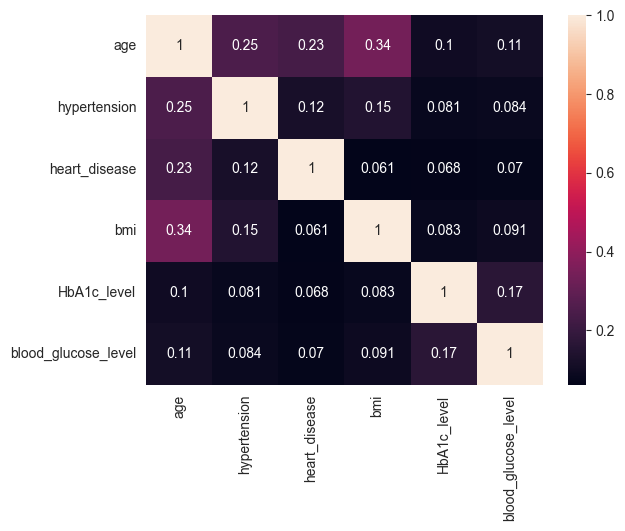

In [59]:
sns.heatmap(df.iloc[:,:-1].corr(method='pearson', numeric_only=True), annot=True)
plt.show()

Pode-se perceber pelo gráfico de correlação entre as variáveis independentes, que estas não são correlacionadas entre si, sendo assim, não possui multicolinearidade.
### 5 - Relação linear entre cada VI contínua (Variável Independente) e o logito da VD (Variável Dependente)

## Transformação dos dados

In [60]:
df2 = pd.get_dummies(df, columns=['gender', 'smoking_history'])
df2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0


In [61]:
df2['age'] = df2['age'].astype(int)
df2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0


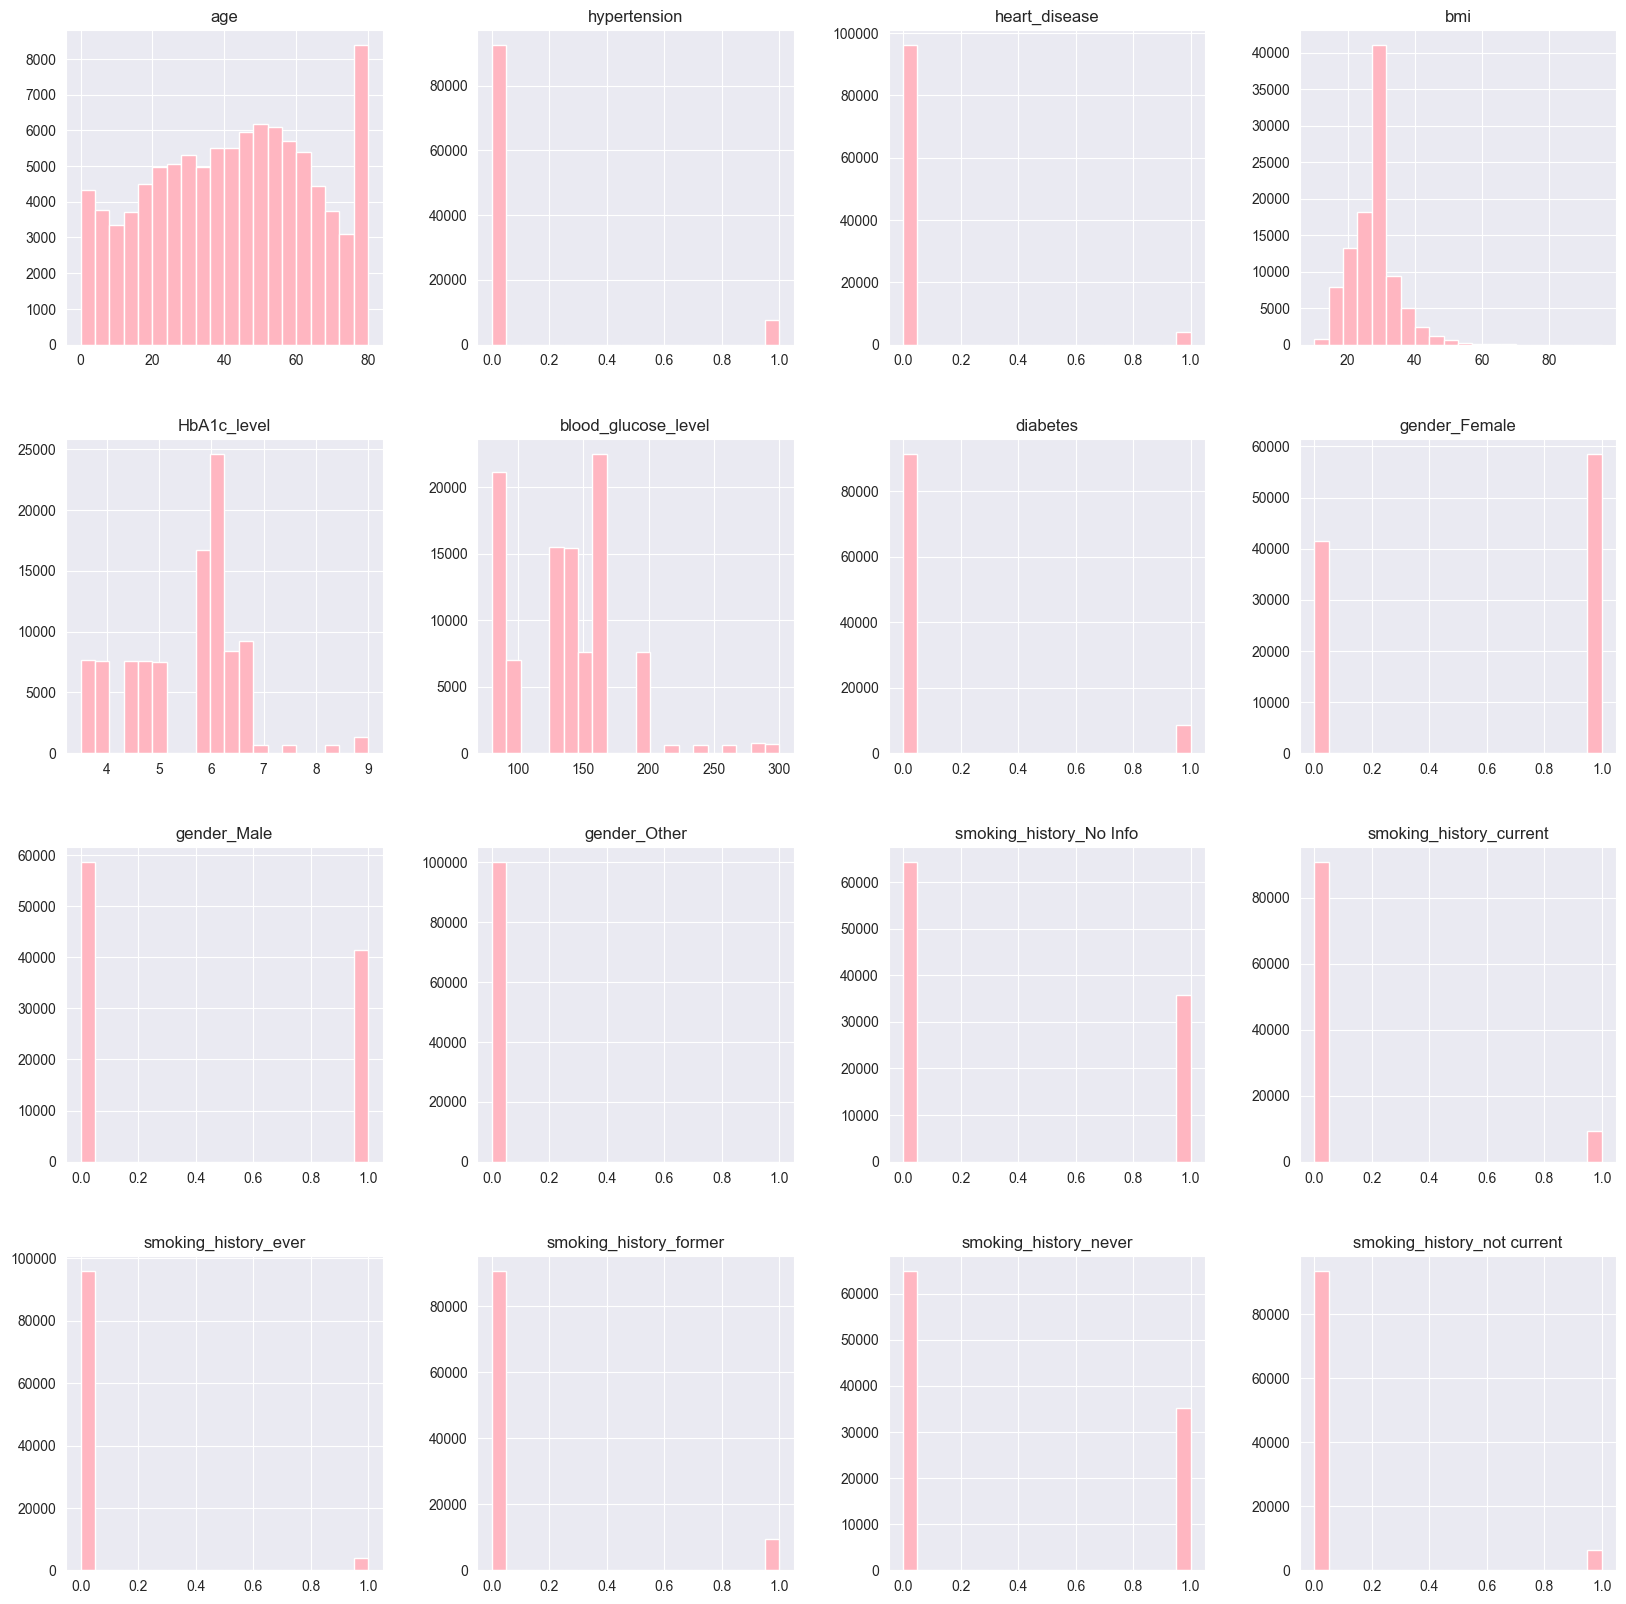

In [72]:
#Análise por variável

df2.hist(bins=20, color='lightpink', figsize=(20,20))
plt.show()

## Seleção de variáveis (Feature Selection)

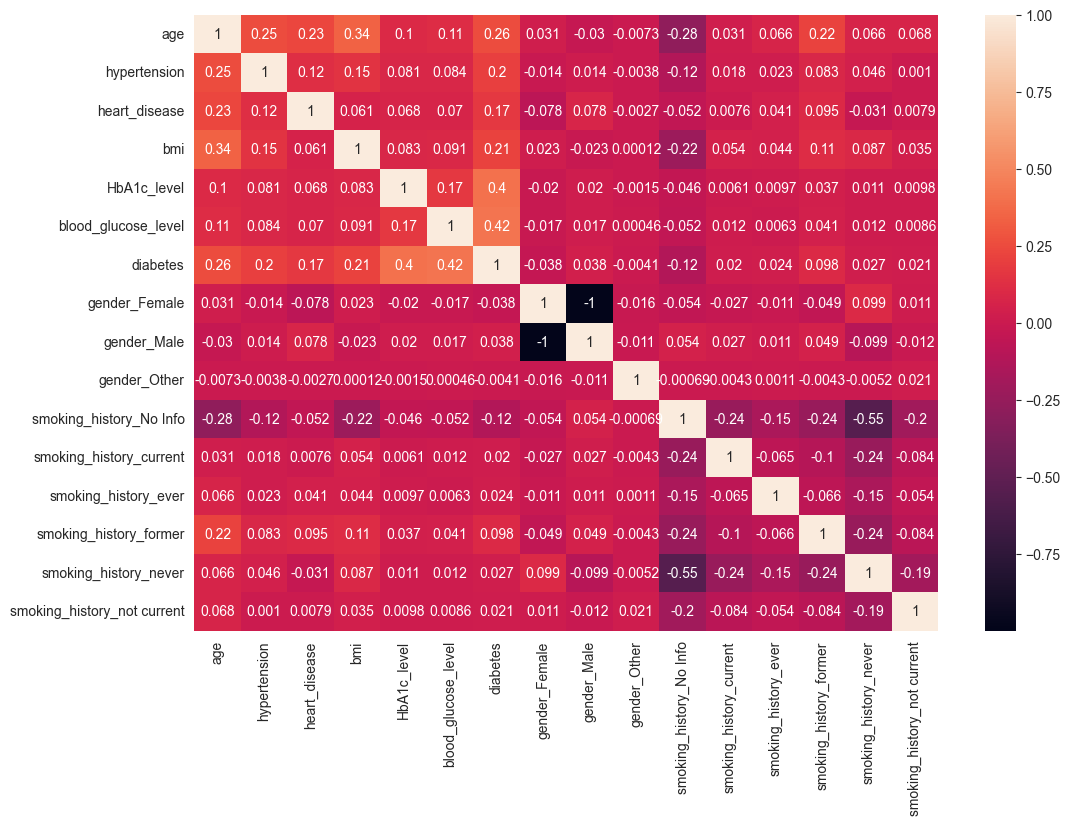

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(method='pearson', numeric_only=True), annot=True)
plt.show()

## Separação em treino e teste

- Train = 80%
- Test = 20%

In [75]:
X = df2.drop('diabetes', axis=1).values
y = df[['diabetes']].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Padronização dos dados

In [77]:
#MinMaxScaler

mms = MinMaxScaler()
X_train_mmscaled = mms.fit_transform(X_train)
X_test_mmscaled = mms.transform(X_test)

In [78]:
#StandardScaler

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## Balanceamento de classes

### Balanceamento com padronização MinMaxScaler

In [89]:
#Under Sampling: Subamostra, reduz a classe majoritáira até o tamanho da classe minoritária.

print("Antes: \n", Counter(y_train[:,0]))

undersample = RandomUnderSampler(random_state=42)

X_train_under_mms, y_train_under_mms = undersample.fit_resample(X_train_mmscaled, y_train)

print("Depois: \n", Counter(y_train_under_mms))

Antes: 
 Counter({0: 73200, 1: 6800})
Depois: 
 Counter({0: 6800, 1: 6800})


In [90]:
#Over Sampling: Sobreamostra, aumenta a classe minoritária até o tamanho da classe majoritária, isso é feito com dados/amostra sintéticos(as).

print("Antes: \n", Counter(y_train[:,0]))

oversample = SMOTE(random_state=42)

X_train_over_mms, y_train_over_mms = oversample.fit_resample(X_train_mmscaled, y_train)

print("Depois: \n", Counter(y_train_over_mms))

Antes: 
 Counter({0: 73200, 1: 6800})
Depois: 
 Counter({0: 73200, 1: 73200})


### Balanceamento com padronização StandardScaler

In [91]:
#Under Sampling: Subamostra, reduz a classe majoritáira até o tamanho da classe minoritária.

print("Antes: \n", Counter(y_train[:,0]))

undersample = RandomUnderSampler(random_state=42)

X_train_under_ss, y_train_under_ss = undersample.fit_resample(X_train_scaled, y_train)

print("Depois: \n", Counter(y_train_under_ss))

Antes: 
 Counter({0: 73200, 1: 6800})
Depois: 
 Counter({0: 6800, 1: 6800})


In [92]:
#Over Sampling: Sobreamostra, aumenta a classe minoritária até o tamanho da classe majoritária, isso é feito com dados/amostra sintéticos(as).

print("Antes: \n", Counter(y_train[:,0]))

oversample = SMOTE(random_state=42)

X_train_over_ss, y_train_over_ss = oversample.fit_resample(X_train_scaled, y_train)

print("Depois: \n", Counter(y_train_over_ss))

Antes: 
 Counter({0: 73200, 1: 6800})
Depois: 
 Counter({0: 73200, 1: 73200})


## Modelo

### Modelo com padronização MinMaxScaler e balanceamento de classes Under Sampling

In [93]:
#Modelo
clr_under_mms = LogisticRegression()

#Treina modelo
clr_under_mms.fit(X_train_under_mms, y_train_under_mms)

#Predição
y_pred_under_mms = clr_under_mms.predict(X_test_mmscaled)

#Avaliação da predição do modelo
print(metrics.classification_report(y_test, y_pred_under_mms))

print("MSE: ", metrics.mean_squared_error(y_test, y_pred_under_mms))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.42      0.87      0.57      1700

    accuracy                           0.89     20000
   macro avg       0.70      0.88      0.75     20000
weighted avg       0.94      0.89      0.90     20000

MSE:  0.1127


### Modelo com padronização MinMaxScaler e balanceamento de classes Over Sampling

In [94]:
#Modelo
clr_over_mms = LogisticRegression()

#Treina modelo
clr_over_mms.fit(X_train_over_mms, y_train_over_mms)

#Predição
y_pred_over_mms = clr_over_mms.predict(X_test_mmscaled)

#Avaliação da predição do modelo
print(metrics.classification_report(y_test, y_pred_over_mms))

print("MSE: ", metrics.mean_squared_error(y_test, y_pred_over_mms))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.42      0.88      0.57      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.88      0.75     20000
weighted avg       0.94      0.89      0.90     20000

MSE:  0.11165


### Modelo com padronização StandardScaler e balanceamento de classes Under Sampling

In [95]:
#Modelo
clr_under_ss = LogisticRegression()

#Treina modelo
clr_under_ss.fit(X_train_under_ss, y_train_under_ss)

#Predição
y_pred_under_ss = clr_under_ss.predict(X_test_scaled)

#Avaliação da predição do modelo
print(metrics.classification_report(y_test, y_pred_under_ss))

print("MSE: ", metrics.mean_squared_error(y_test, y_pred_under_ss))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.42      0.88      0.57      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.88      0.75     20000
weighted avg       0.94      0.89      0.90     20000

MSE:  0.1121


### Modelo com padronização SandardScaler e balanceamento de classes Over Sampling

In [96]:
#Modelo
clr_over_ss = LogisticRegression()

#Treina modelo
clr_over_ss.fit(X_train_over_ss, y_train_over_ss)

#Predição
y_pred_over_ss = clr_over_ss.predict(X_test_scaled)

#Avaliação da predição do modelo
print(metrics.classification_report(y_test, y_pred_over_ss))

print("MSE: ", metrics.mean_squared_error(y_test,y_pred_over_ss))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.42      0.88      0.57      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.88      0.75     20000
weighted avg       0.94      0.89      0.90     20000

MSE:  0.11145


O modelo com padronização StandardScaler e balanceamento de classes Under Sampling foi o melhor comparado aos demais, sendo o modelo com o menor valor de MSE.

## Avaliação do modelo

In [97]:
#Modelo (clr - classifier logistic regression ou Classificador de Regressão Logística)
clr = LogisticRegression()

#Treina modelo
clr.fit(X_train_under_ss, y_train_under_ss)

#Predição
y_pred_under_ss = clr.predict(X_test_scaled)

#Avaliação da predição do modelo
print(metrics.classification_report(y_test, y_pred_under_ss))

print("MSE: ", metrics.mean_squared_error(y_test,y_pred_under_ss))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.42      0.88      0.57      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.88      0.75     20000
weighted avg       0.94      0.89      0.90     20000

MSE:  0.1121


- Acurácia de 89% -> um nível bom considerando um modelo "puro";
- Precisão de 99% para a classe 0 (negativo para diabetes)e 42% para a classe 1 (positivo para diabetes), aparentemente o modelo se comportou bem para a classe 0, porém foi ruim para classe 1;
- Recall (sensibilidade do modelo) de 89% para ambas as classes;
- F1-score, que é uma métrica que mostra a média harmônica entre precisão e recall, apresenta 94% para a classe 0 e 57% para a classe 1, sendo assim, poderiamos dizer que o modelo não está 100% bom, porém considerando um modelo "puro" está relativamente se comportanto bem;
- MSE (Erro Quadrático Médio) que retornou um erro do modelo de `0,1125`, considerando as classificações, um erro baixo (próximo a 0) é sempre melhor.

**Sendo assim, consideramos o modelo, um modelo bom para o estudo em questão.**

### Analisando o modelo por testes de predição e por matriz de confusão

In [98]:
#Teste predição direta do modelo

clr.predict(X_test_scaled)[0]

0

In [99]:
#Teste predição com porcentagem da classe definida na predição direta [0 , 1]

clr.predict_proba(X_test_scaled)[0]

array([9.99586371e-01, 4.13629120e-04])

In [101]:
metrics.confusion_matrix(y_test, y_pred_under_ss)

array([[16267,  2033],
       [  209,  1491]], dtype=int64)

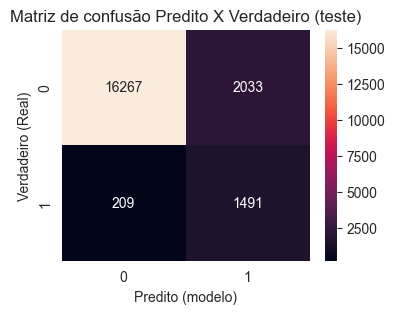

In [103]:
plt.figure(figsize=(4,3))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_under_ss), annot=True, fmt=".0f")
plt.title('Matriz de confusão Predito X Verdadeiro (teste)')
plt.xlabel('Predito (modelo)')
plt.ylabel('Verdadeiro (Real)')
plt.show()

O modelo em questão conseguiu acertar um número considerável de classes Verdadeiro Positivo e Verdadeiro Negativo com um número relativamente baixo para Falso Positivo e para Falso Negativo.

O modelo na forma "pura" em que foi desenvolvido está relativamente bom para o estudo realizado.

In [104]:
coefficients = clr.coef_[0]

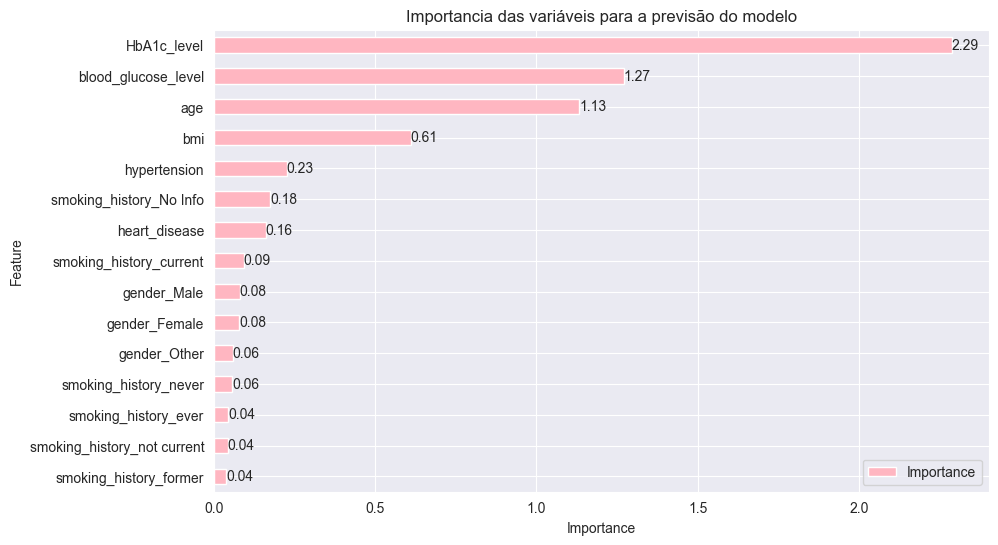

In [106]:
feature_importance = pd.DataFrame({'Feature': df2.drop('diabetes', axis=1).columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), color='lightpink')

type_values = feature_importance['Importance'].values
type_labels = ["{:.2f}".format(value) for value in type_values]
ax.bar_label(container=ax.containers[0], labels=type_labels)

ax.set(xlabel='Importance')
ax.set(ylabel='Feature')
plt.title('Importancia das variáveis para a previsão do modelo')
plt.show()

## Previsão (teste do modelo)

In [107]:
#Verificando ordem das colunas que entraram no modelo

colunas_real = list(df2.drop('diabetes', axis=1).columns)
colunas_real

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'smoking_history_No Info',
 'smoking_history_current',
 'smoking_history_ever',
 'smoking_history_former',
 'smoking_history_never',
 'smoking_history_not current']

In [108]:
#Função que realiza um OneHotEncoder/Get Dummies manual a partir da variável 'gender'

def definiGender(gender):
  if gender == 'Female':
    return {'gender_Female':1, 'gender_Male':0, 'gender_Other':0}
  if gender == 'Male':
    return {'gender_Female':0, 'gender_Male':1, 'gender_Other':0}
  if gender == 'Male':
    return {'gender_Female':0, 'gender_Male':0, 'gender_Other':1}

In [109]:
#Função que realiza um OneHotEncoder/Get Dummies manual a partir da variável 'smoking_history'

def definirSmokingHistory(smokinghistory):
  smoking_history = {
                    'never': {'smoking_history_No Info':0, 'smoking_history_current':0, 'smoking_history_ever':0,
                              'smoking_history_former':0, 'smoking_history_never':1, 'smoking_history_not current':0},
                    'No Info': {'smoking_history_No Info':1, 'smoking_history_current':0, 'smoking_history_ever':0,
                                'smoking_history_former':0, 'smoking_history_never':0, 'smoking_history_not current':0},
                    'current': {'smoking_history_No Info':0, 'smoking_history_current':1, 'smoking_history_ever':0,
                                'smoking_history_former':0, 'smoking_history_never':0, 'smoking_history_not current':0},
                    'former': {'smoking_history_No Info':0, 'smoking_history_current':0, 'smoking_history_ever':0,
                                'smoking_history_former':1, 'smoking_history_never':0, 'smoking_history_not current':0},
                    'ever': {'smoking_history_No Info':0, 'smoking_history_current':0, 'smoking_history_ever':1,
                              'smoking_history_former':0, 'smoking_history_never':0, 'smoking_history_not current':0},
                    'not current': {'smoking_history_No Info':0, 'smoking_history_current':0, 'smoking_history_ever':0,
                                    'smoking_history_former':0, 'smoking_history_never':0, 'smoking_history_not current':1}
                    }

  return smoking_history[smokinghistory]

#### Teste do modelo - 1

In [110]:
#Teste do modelo, inserindo dados de um paciente fictício

gender = 'Male'
age = int(27)
hypertension = 0
heart_disease =  1
smoking_history = 'never'
bmi = 25.10
HbA1c_level = 5.5
blood_glucose_level = 155

In [117]:
#Cria dicionário para os dados em questão do teste
dict_dados = {}

#Insere dados gerais do paciente
dict_dados.update({'age': age, 'hypertension': hypertension, 'heart_disease': heart_disease,
                   'bmi': bmi, 'HbA1c_level': HbA1c_level, 'blood_glucose_level': blood_glucose_level})

#Insere dados do 'gênero' do paciente já com o getdummies realizado
dict_dados.update(definiGender(gender))

#Insere dados do 'histórico de tabagismo' do paciente já com o getdummies realizado
dict_dados.update(definirSmokingHistory(smoking_history))

#Visualizando dados do paciente fictício
dict_dados

{'age': 27,
 'hypertension': 0,
 'heart_disease': 1,
 'bmi': 25.1,
 'HbA1c_level': 6.8,
 'blood_glucose_level': 172,
 'gender_Female': 1,
 'gender_Male': 0,
 'gender_Other': 0,
 'smoking_history_No Info': 0,
 'smoking_history_current': 0,
 'smoking_history_ever': 0,
 'smoking_history_former': 0,
 'smoking_history_never': 1,
 'smoking_history_not current': 0}

In [112]:
#Testando a padronização do dados fictícios para a teste do modelo

scalar.transform(np.array(list(dict_dados.values())).reshape(1,-1))

array([[-0.66211147, -0.28472174,  4.87679684, -0.33486495, -0.02326279,
         0.41363625, -1.18826064,  1.18875036, -0.01414355, -0.74676819,
        -0.31811996, -0.20511881, -0.32222493,  1.35929558, -0.26255057]])

In [113]:
#Testando o modelo com os dados fictícios

clr.predict(scalar.transform(np.array(list(dict_dados.values())).reshape(1,-1)))

array([0], dtype=int64)

In [114]:
#Testando o modelo com os dados fictícios para verificar a porcentagem por classe

clr.predict_proba(scalar.transform(np.array(list(dict_dados.values())).reshape(1,-1)))

array([[0.90332901, 0.09667099]])

### Teste do modelo - 2

In [115]:
#Teste do modelo, inserindo dados de um paciente fictício

gender = 'Female'
age = int(27)
hypertension = 0
heart_disease =  1
smoking_history = 'never'
bmi = 25.10
HbA1c_level = 6.8
blood_glucose_level = 172

In [116]:
#Cria dicionário para os dados em questão do teste
dict_dados = {}

#Insere dados gerais do paciente
dict_dados.update({'age': age, 'hypertension': hypertension, 'heart_disease': heart_disease,
                   'bmi': bmi, 'HbA1c_level': HbA1c_level, 'blood_glucose_level': blood_glucose_level})

#Insere dados do 'gênero' do paciente já com o getdummies realizado
dict_dados.update(definiGender(gender))

#Insere dados do 'histórico de tabagismo' do paciente já com o getdummies realizado
dict_dados.update(definirSmokingHistory(smoking_history))

#Visualizando dados do paciente fictício
dict_dados

{'age': 27,
 'hypertension': 0,
 'heart_disease': 1,
 'bmi': 25.1,
 'HbA1c_level': 6.8,
 'blood_glucose_level': 172,
 'gender_Female': 1,
 'gender_Male': 0,
 'gender_Other': 0,
 'smoking_history_No Info': 0,
 'smoking_history_current': 0,
 'smoking_history_ever': 0,
 'smoking_history_former': 0,
 'smoking_history_never': 1,
 'smoking_history_not current': 0}

In [118]:
#Testando o modelo com os dados fictícios

clr.predict(scalar.transform(np.array(list(dict_dados.values())).reshape(1,-1)))

array([1], dtype=int64)

In [119]:
#Testando o modelo com os dados fictícios para verificar a porcentagem por classe

clr.predict_proba(scalar.transform(np.array(list(dict_dados.values())).reshape(1,-1)))

array([[0.32161708, 0.67838292]])

## Exportando o modelo

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
